In [145]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile,execute, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
import networkx as nx
from qiskit.algorithms.optimizers import COBYLA
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options
from qiskit.utils import algorithm_globals
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [146]:

from qiskit.circuit.quantumcircuit import QuantumCircuit
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz

        

In [147]:
from qiskit import Aer
#from qiskit.optimization.applications.ising import tsp
from qiskit_optimization.applications import Tsp
#from qiskit.aqua.algorithms import NumPyMinimumEigensolver, QAOA
from qiskit.algorithms.minimum_eigensolvers import QAOA , NumPyMinimumEigensolver
#from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
#from qiskit.optimization.problems import QuadraticProgram
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import Sampler
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz
from qiskit.quantum_info.operators import Operator # Generating a TSP instance of n cities
n = 3
num_qubits = n ** 2
tsp =Tsp.create_random_instance(n, seed=122)
adj_matrix = nx.to_numpy_array(tsp.graph)
print("distance\n", adj_matrix)

# Create a random TSP Hamiltonian
qp = tsp.to_quadratic_program()
print(qp.prettyprint())

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
qubitOp, offset = qubo.to_ising()
print(qubitOp, offset)




distance
 [[ 0. 45. 33.]
 [45.  0. 53.]
 [33. 53.  0.]]
Problem name: TSP

Minimize
  45*x_0_0*x_1_1 + 45*x_0_0*x_1_2 + 33*x_0_0*x_2_1 + 33*x_0_0*x_2_2
  + 45*x_0_1*x_1_0 + 45*x_0_1*x_1_2 + 33*x_0_1*x_2_0 + 33*x_0_1*x_2_2
  + 45*x_0_2*x_1_0 + 45*x_0_2*x_1_1 + 33*x_0_2*x_2_0 + 33*x_0_2*x_2_1
  + 53*x_1_0*x_2_1 + 53*x_1_0*x_2_2 + 53*x_1_1*x_2_0 + 53*x_1_1*x_2_2
  + 53*x_1_2*x_2_0 + 53*x_1_2*x_2_1

Subject to
  Linear constraints (6)
    x_0_0 + x_0_1 + x_0_2 == 1  'c0'
    x_1_0 + x_1_1 + x_1_2 == 1  'c1'
    x_2_0 + x_2_1 + x_2_2 == 1  'c2'
    x_0_0 + x_1_0 + x_2_0 == 1  'c3'
    x_0_1 + x_1_1 + x_2_1 == 1  'c4'
    x_0_2 + x_1_2 + x_2_2 == 1  'c5'

  Binary variables (9)
    x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2

-826.0 * IIIIIIIIZ
- 826.0 * IIIIIIIZI
- 826.0 * IIIIIIZII
- 836.0 * IIIIIZIII
- 836.0 * IIIIZIIII
- 836.0 * IIIZIIIII
- 830.0 * IIZIIIIII
- 830.0 * IZIIIIIII
- 830.0 * ZIIIIIIII
+ 393.5 * IIIIIIIZZ
+ 393.5 * IIIIIIZIZ
+ 393.5 * IIIIIIZZI
+ 393.5 * IIIIIZIIZ
+

In [148]:
from qiskit.circuit import QuantumCircuit, ParameterVector
import numpy as np
# The below code is the implementation for QAOA+ Problem Independent Appended Layer the phase angles are set to be 
# random between pi/2 and -pi/2. (phase parameter can be changed)

#I n order to run QAOA+ this layer must be added after simple qaoa layer.
#9 qubit for 3 node tsp and 16 for 4 node tsp 




In [149]:

circuit = QAOAAnsatz( cost_operator=qubitOp, reps=1)
circuit =circuit.decompose( reps=3)
'''p =1
alpha = ParameterVector('α', length=(1))
circuit.barrier()
for i in range(num_qubits - 1):
    circuit.crz(alpha[0], i, i+1)

        

# Apply X gates to all qubits

circuit.x(range(num_qubits))
circuit.bind_parameters({alpha[0] : 1}).draw()'''



"p =1\nalpha = ParameterVector('α', length=(1))\ncircuit.barrier()\nfor i in range(num_qubits - 1):\n    circuit.crz(alpha[0], i, i+1)\n\n        \n\n# Apply X gates to all qubits\n\ncircuit.x(range(num_qubits))\ncircuit.bind_parameters({alpha[0] : 1}).draw()"

In [150]:
circuit.parameters


ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(γ[0])])

In [151]:
#bind_dict = {}
#param = [1.1,2.1]
#for i in range(0,2):
#    for key in circuit.parameters:
#        bind_dict[key] = param[0]

    

#circuit.bind_parameters(bind_dict)
bind_dict = {}
param = [1.1, 2.1]
for i, key in enumerate(circuit.parameters):
    bind_dict[key] = param[i]
    
circuit.bind_parameters(bind_dict)



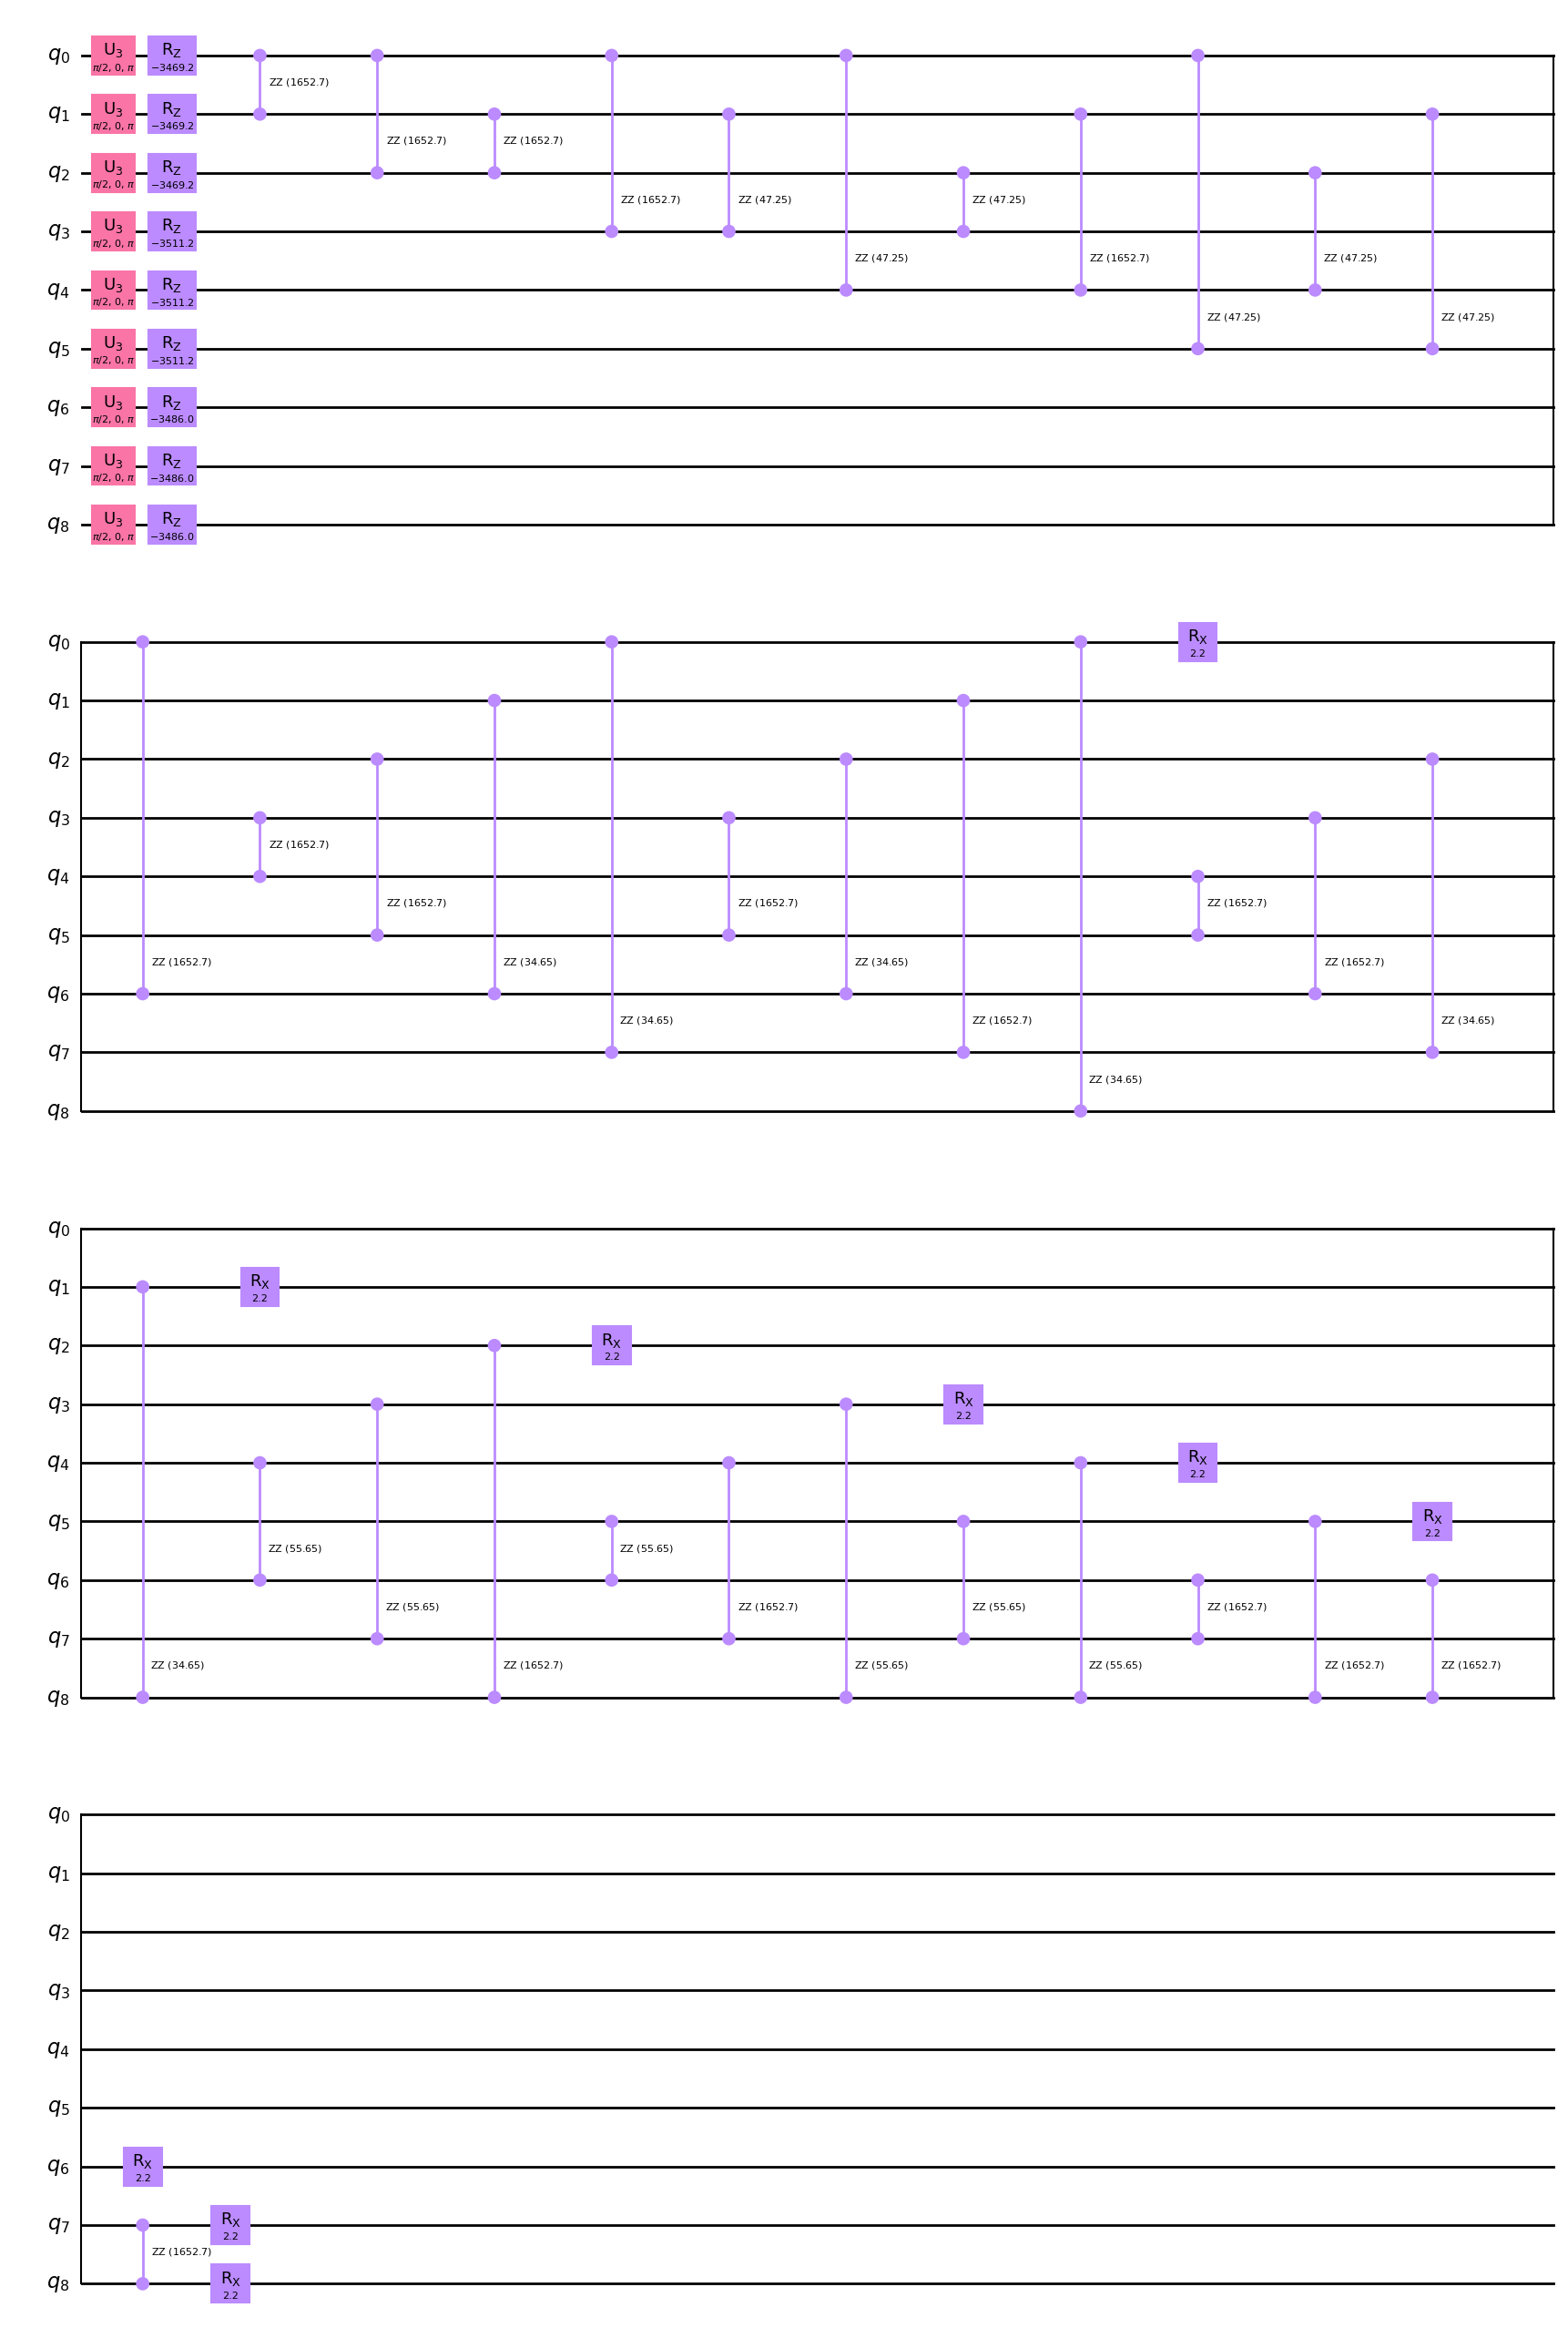

In [152]:
circuit.bind_parameters(bind_dict).draw()

In [153]:
circuit.measure_all()

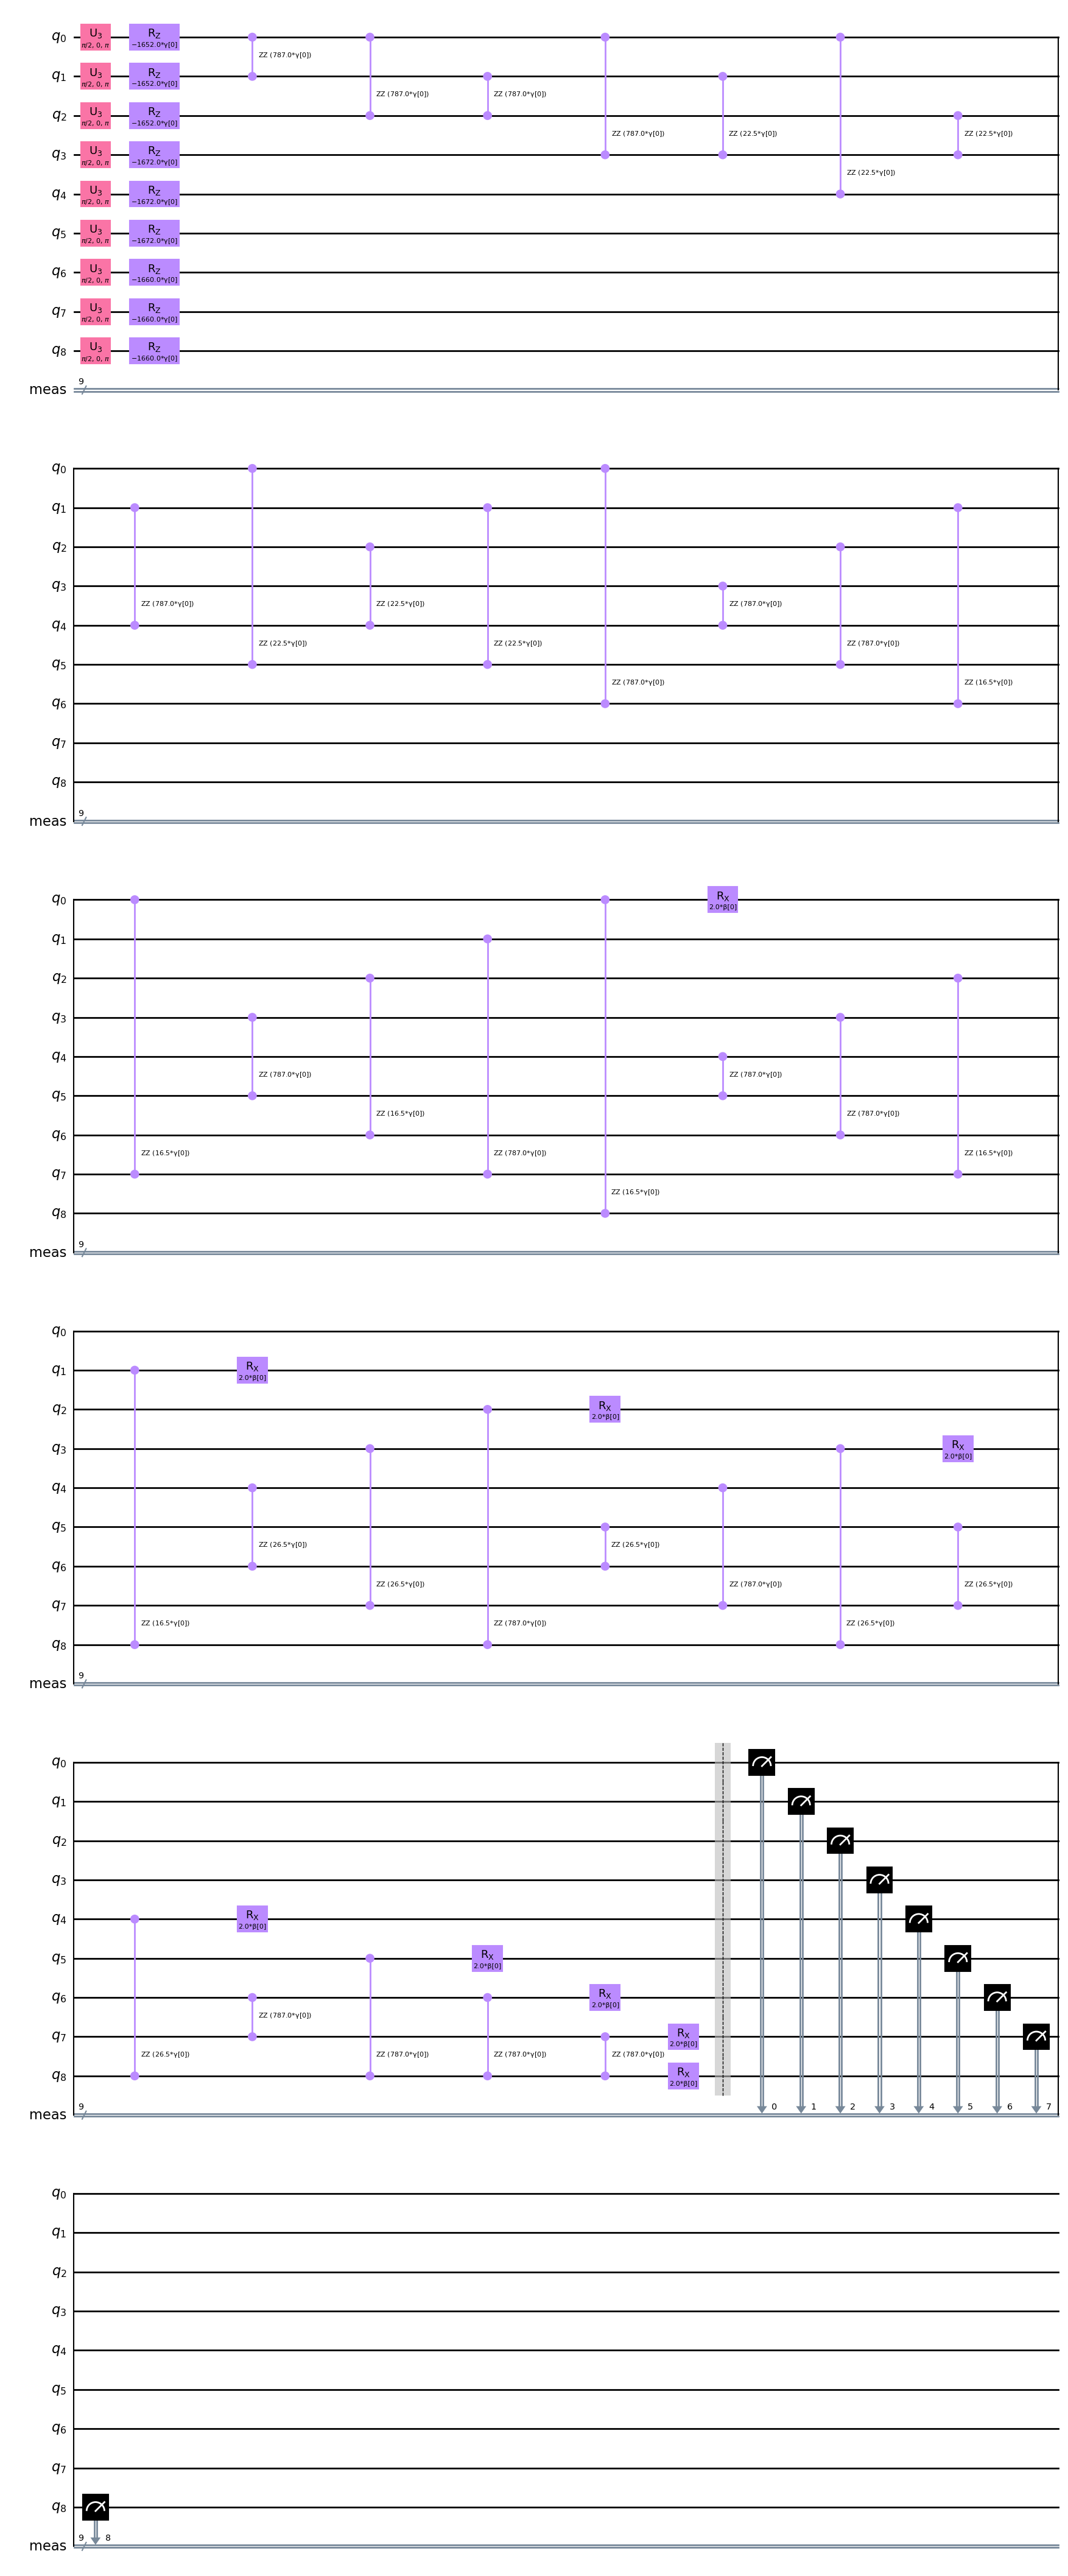

In [154]:
circuit.draw()

In [155]:
def invert_counts(counts):
    return {k[::-1]:v for k, v in counts.items()}

In [156]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend)
result = job.result()
print(invert_counts(result.get_counts()))
plot_histogram(job.result().get_counts())
counts =invert_counts(result.get_counts())
# Find the highest count and its corresponding outcome
highest_count = 0
highest_outcome = None

# Dictionary to store the count occurrences
count_occurrences = {}

for outcome, count in counts.items():
    if count > highest_count:
        highest_count = count
        highest_outcome = outcome
    
    # Update count occurrences
    if count in count_occurrences:
        count_occurrences[count].append(outcome)
    else:
        count_occurrences[count] = [outcome]

print("Highest Count:", highest_count)
print("Highest Outcome:", highest_outcome)

# Find the lowest count and its corresponding outcome
lowest_count = float('inf')
lowest_outcome = None

for outcome, count in counts.items():
    if count < lowest_count:
        lowest_count = count
        lowest_outcome = outcome

print("Lowest Count:", lowest_count)
print("Lowest Outcome:", lowest_outcome)

# Show count occurrences
print("Count Occurrences:")
for count, outcomes in count_occurrences.items():
    print("Count:", count)
    print("Occurrences:", len(outcomes))
    print("Outcomes:", outcomes)
    print()


{'110011000': 1, '000100010': 1, '111000110': 1, '001000111': 1, '110111000': 1, '111000101': 2, '100100001': 1, '000001010': 1, '111111000': 2, '001011011': 1, '010101010': 1, '111111101': 1, '110101101': 1, '110111011': 1, '101100111': 2, '100010101': 1, '000000110': 2, '001001010': 1, '010100100': 3, '111101101': 1, '011000110': 1, '111011011': 1, '100101001': 1, '110010110': 1, '110010101': 1, '100101011': 2, '111110010': 4, '001110011': 4, '100000110': 3, '011100001': 1, '110100010': 1, '101100001': 2, '011010001': 5, '100101010': 1, '110011001': 1, '011110100': 1, '100011010': 1, '101101011': 1, '101101010': 1, '101000110': 2, '110010010': 1, '001010101': 2, '010001011': 1, '010011001': 3, '101111000': 3, '001001110': 2, '000100100': 2, '011001101': 1, '001001011': 3, '100001101': 1, '101000011': 2, '110000110': 3, '110100111': 2, '010111001': 3, '011110101': 3, '100111101': 2, '010110010': 2, '101101110': 1, '101011101': 2, '110010001': 2, '100111100': 1, '010100011': 1, '011010

In [199]:
#0 0 1 1 0 0 0 1 0

def compute_tsp_energy(counts, adj_matrix):
    energy = 0
    total_counts = 0
    for meas, meas_count in counts.items():
        binary_list =  list(map(int, meas)) # [int(bit) for bit in meas]
        meas_arr = np.array(binary_list)
        c = [0, 0, 1, 1, 0, 0, 0, 1, 0]
        obj_for_meas = tsp.tsp_value(tsp.interpret(np.array(binary_list)),adj_matrix)
        

    return  binary_list, obj_for_meas

print(compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix))
c = [0, 0, 1, 1, 0, 0, 0, 1, 0]
print('c',type(c))
print(tsp.tsp_value(tsp.interpret(np.array(c)),adj_matrix))
print(type([0, 0, 1, 1, 0, 0, 0, 1, 0]))

Traceback (most recent call last):
  Cell In[199], line 15
    print(compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix))
  Cell In[199], line 10 in compute_tsp_energy
    obj_for_meas = tsp.tsp_value(tsp.interpret(np.array(binary_list)),adj_matrix)
  File /opt/conda/lib/python3.10/site-packages/qiskit_optimization/applications/tsp.py:213 in tsp_value
    ret += adj_matrix[z[i], z[i + 1]]
IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (0,) 

Use %tb to get the full traceback.


In [182]:
def compute_tsp_energy(counts, G):
    energy = 0
    total_counts = 0
    for meas, meas_count in counts.items():
        binary_list = [int(bit) for bit in meas]
        meas_arr = np.array(binary_list)
        obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)
        energy += obj_for_meas * meas_count
        total_counts += meas_count
    return energy / total_counts

In [27]:
from qiskit.algorithms.minimum_eigensolvers import QAOA
algorithm_globals.random_seed = 10598

from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter = 1000)
sampler = Sampler()
qaoa = QAOA(sampler, optimizer, reps=1,initial_state=circuit)


# solving the Problem using QAOA
qrc = qaoa.compute_minimum_eigenvalue(None)


Traceback (most recent call last):
  Cell In[27], line 11
    qrc = qaoa.compute_minimum_eigenvalue(None)
  File /opt/conda/lib/python3.10/site-packages/qiskit/algorithms/minimum_eigensolvers/sampling_vqe.py:196 in compute_minimum_eigenvalue
    self._check_operator_ansatz(operator)
  File /opt/conda/lib/python3.10/site-packages/qiskit/algorithms/minimum_eigensolvers/qaoa.py:149 in _check_operator_ansatz
    ).decompose()  # TODO remove decompose once #6674 is fixed
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/library/blueprintcircuit.py:97 in decompose
    self._build()
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/library/n_local/qaoa_ansatz.py:258 in _build
    super()._build()
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/library/evolved_operator_ansatz.py:198 in _build
    self._check_configuration()
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/library/n_local/qaoa_ansatz.py:82 in _check_configuration
    raise Valu

In [ ]:
'''from qiskit.circuit import ParameterVector, QuantumCircuit

# define your parameters
p = ParameterVector('p', 1)  

circuit = QuantumCircuit(2)
circuit.rx(p[0], 0)  # RX(p[0]) on qubit 0
circuit.ry(p[0], 0)  # RY(p[1]) on qubit 1
circuit.crz(p[0], 0, 1)  # CRZ(p[2]) controlled on qubit 0, acting on qubit 1

# bind the values
bound_circuit = circuit.bind_parameters({p: [0]})
bound_circuit.draw()'''


In [96]:
import numpy as np

binary_string = '1010100010101'

# Convert binary string to a list of integers
binary_list = [int(bit) for bit in binary_string]

# Convert list to NumPy array
np_array = np.array(binary_list)

print(type(binary_list))


<class 'list'>


In [78]:
def compute_tsp_energy(counts, G):
    energy = 0
    total_counts = 0
    for meas, meas_count in counts.items():
        binary_list = [int(bit) for bit in meas]
        meas_arr = np.array(binary_list)
        obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)
        energy += obj_for_meas * meas_count
        total_counts += meas_count
    return energy / total_counts

compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix)

Traceback (most recent call last):
  Cell In[78], line 12
    compute_tsp_energy(invert_counts(result.get_counts()), adj_matrix)
  Cell In[78], line 7 in compute_tsp_energy
    obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)
  File /opt/conda/lib/python3.10/site-packages/qiskit_optimization/applications/tsp.py:213 in tsp_value
    ret += adj_matrix[z[i], z[i + 1]]
ValueError: operands could not be broadcast together with shapes (3,) (2,) (3,) 

Use %tb to get the full traceback.


In [97]:
for meas, meas_count in counts.items():
        binary_list = [int(bit) for bit in meas]
        meas_arr = np.array(binary_list)
        obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)

Traceback (most recent call last):
  Cell In[97], line 4
    obj_for_meas = tsp.tsp_value(tsp.interpret(meas_arr),adj_matrix)
  File /opt/conda/lib/python3.10/site-packages/qiskit_optimization/applications/tsp.py:213 in tsp_value
    ret += adj_matrix[z[i], z[i + 1]]
ValueError: operands could not be broadcast together with shapes (2,) (0,) (2,) 

Use %tb to get the full traceback.
